## __Sampling Techniques on a Synthetic Dataset (Imbalanced)__

#### __Import the necessary libraries__

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, average_precision_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


#### __Generate a synthetic dataset__

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate imbalanced dataset
n_samples_1 = 25  # Number of samples in class 1
n_samples_2 = 375  # Number of samples in class 2
centers = [(0, 0), (2, 2)]  # Centers of each cluster
cluster_std = [1.5, 1.5]  # Standard deviation of each cluster

X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=cluster_std,
                  random_state=42)

In [3]:
data = pd.DataFrame(data = X, columns=['Feature 1', 'Feature 2'])
data['Target'] = y
data.head()

,Feature 1,Feature 2,Target
0,2.507745,1.377068,1
1,1.324902,2.934275,1
2,1.215915,3.573514,1
3,2.042478,2.044634,1
4,0.515593,1.811320,1


In [4]:
data['Target'].value_counts()

Target
1    375
0     25
Name: count, dtype: int64

#### __Plotting the imbalanced dataset__

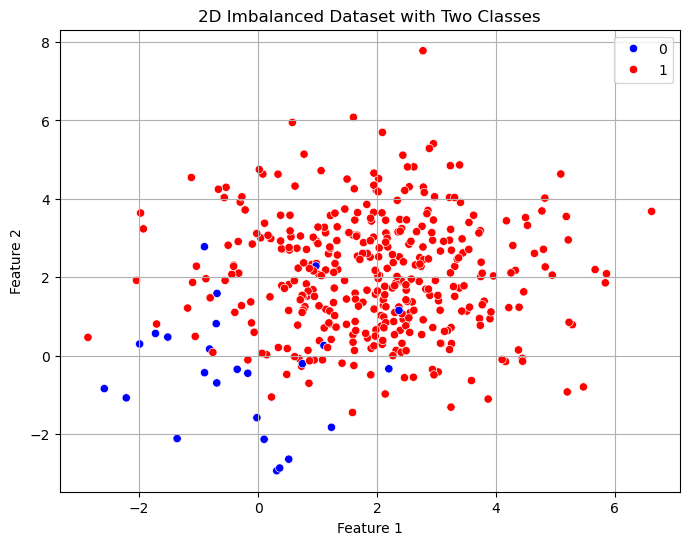

In [5]:
palette = sns.color_palette(['blue', 'red'])

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Feature 1'], y=data['Feature 2'], data=data, hue=data['Target'], palette=palette)
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### __Perform train-test split__

In [29]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
pd.Series(y_train).value_counts()

1    262
0     18
Name: count, dtype: int64

In [65]:
pd.Series(y_test).value_counts()

1    113
0      7
Name: count, dtype: int64

### __1. No Sampling technique - Random Dataset__

#### __Train and Evaluate the Logistic Regression Classifier__

Classification Report (No Sampling):
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.98      0.98      0.98       113

    accuracy                           0.97       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.97      0.97      0.97       120

ROC AUC Score: 0.9292035398230089
Area under the Precision-Recall Curve (AUCPR): 0.99



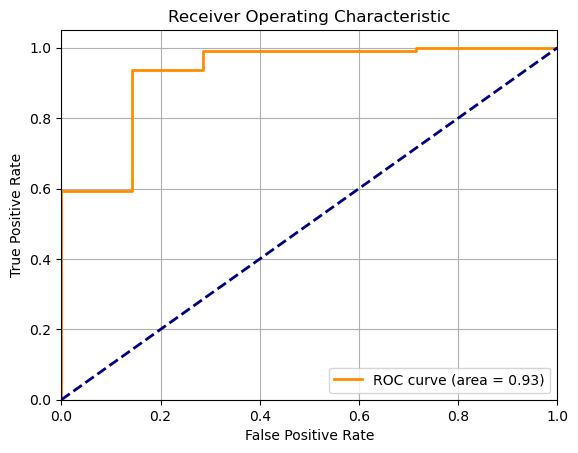

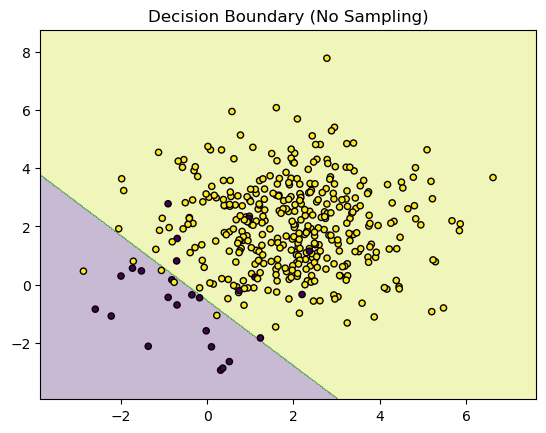

In [38]:
# Initialize and train Logistic Regression classifier
classifier_log_reg = LogisticRegression()
classifier_log_reg.fit(X_train, y_train)

# Predict test set
y_pred_test_log_reg = classifier_log_reg.predict(X_test)
y_pred_test_proba = classifier_log_reg.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report (No Sampling):")
print(classification_report(y_test, y_pred_test_log_reg))

# Print ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_test_proba)}", )
print(f'Area under the Precision-Recall Curve (AUCPR): {average_precision_score(y_test, y_pred_test_proba):.2f}\n')

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (No Sampling)")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier_log_reg)


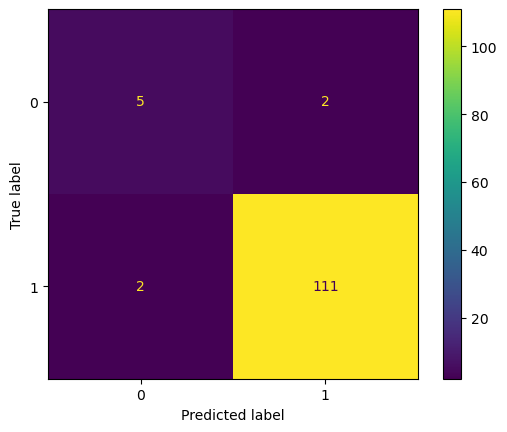

In [31]:
# Print confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_test_log_reg)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_log_reg)

# display matrix
cm_display.plot()
plt.show()

### __2. SMOTE Sampling technique - Random Dataset__

In [32]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### __Plotting the balanced dataset__

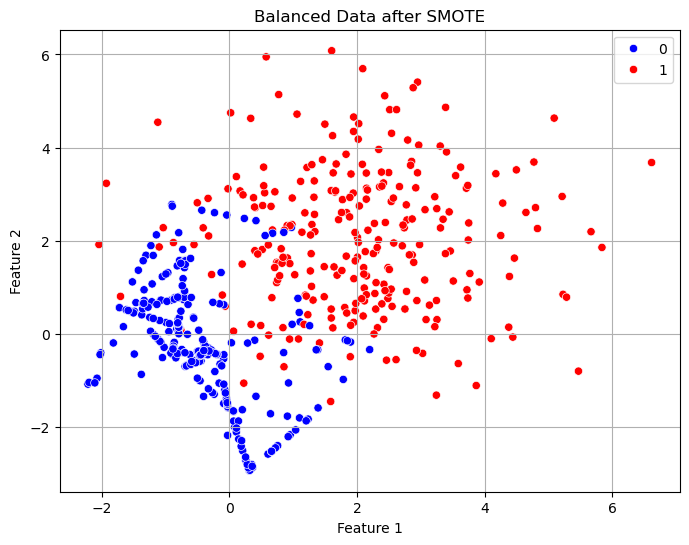

In [33]:
palette = sns.color_palette(['blue', 'red'])

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_smote[:, 0], y=X_train_smote[:, 1], hue=y_train_smote, palette=palette)
plt.title('Balanced Data after SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# plt.legend()
plt.grid(True)
plt.show()

In [34]:
pd.Series(y_train).value_counts()

1    262
0     18
Name: count, dtype: int64

In [35]:
pd.Series(y_train_smote).value_counts()

1    262
0    262
Name: count, dtype: int64

#### __Train and Evaluate the Logistic Regression Classifier__

- Initialize and train a Logistic Regression classifier on the SMOTE sampled training data.
- Predict on the training and testing set and calculate the accuracy.

Classification Report (With SMOTE):
              precision    recall  f1-score   support

           0       0.32      0.86      0.46         7
           1       0.99      0.88      0.93       113

    accuracy                           0.88       120
   macro avg       0.65      0.87      0.70       120
weighted avg       0.95      0.88      0.91       120

ROC AUC Score (With SMOTE): 0.922882427307206
Area under the Precision-Recall Curve (AUCPR) (With SMOTE): 0.99



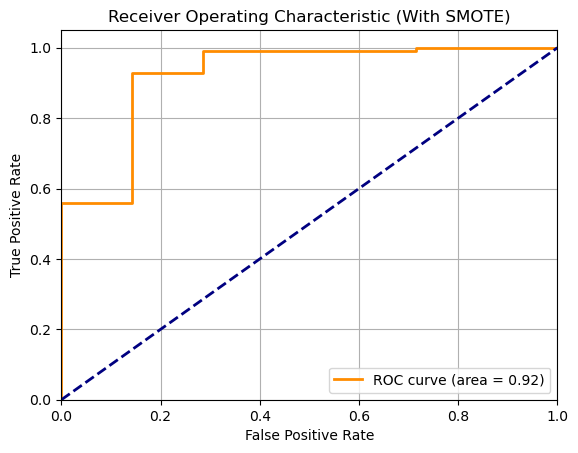

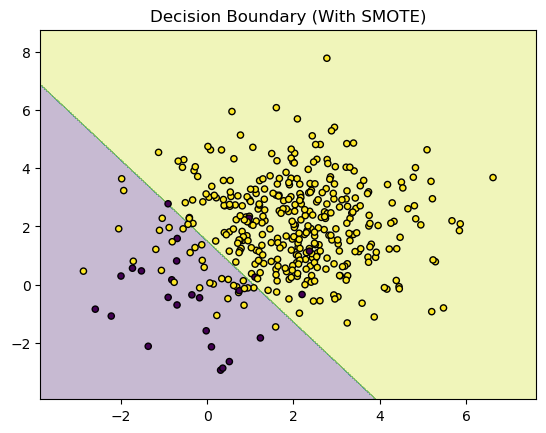

In [37]:
# Initialize and train LogisticRegression classifier on resampled data
classifier_smote = LogisticRegression()
classifier_smote.fit(X_train_smote, y_train_smote)

# Predict test set
y_pred_test_smote = classifier_smote.predict(X_test)
y_pred_test_proba_smote = classifier_smote.predict_proba(X_test)[:, 1]

# Print classification report for SMOTE data
print("Classification Report (With SMOTE):")
print(classification_report(y_test, y_pred_test_smote))

# Print ROC AUC Score for SMOTE data
# print("ROC AUC Score (With SMOTE):", roc_auc_score(y_test, y_proba_smote))
print(f"ROC AUC Score (With SMOTE): {roc_auc_score(y_test, y_pred_test_proba_smote):.2f}", )
print(f'Area under the Precision-Recall Curve (AUCPR) (With SMOTE): {average_precision_score(y_test, y_pred_test_proba_smote):.2f}\n')

# Plotting ROC AUC Curve for SMOTE data
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_pred_test_proba_smote)
plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba_smote))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With SMOTE)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Function to plot decision boundaries for SMOTE data
def plot_decision_boundaries_smote(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With SMOTE)")
    plt.show()

# Plot decision boundary for SMOTE data
plot_decision_boundaries_smote(X, y, classifier_smote)

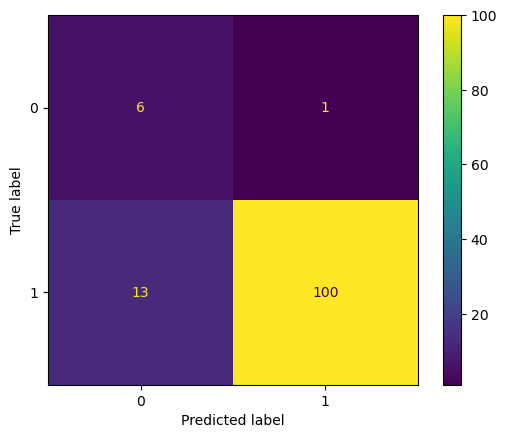

In [39]:
# Print confusion matrix
conf_matrix_smote = confusion_matrix(y_test, y_pred_test_smote)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_smote)

# display matrix
cm_display.plot()
plt.show()

### __3. Random Undersampling technique - Random Dataset__

In [42]:
rnd_undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rnd_undersampler.fit_resample(X_train, y_train)

#### __Plotting the balanced dataset__

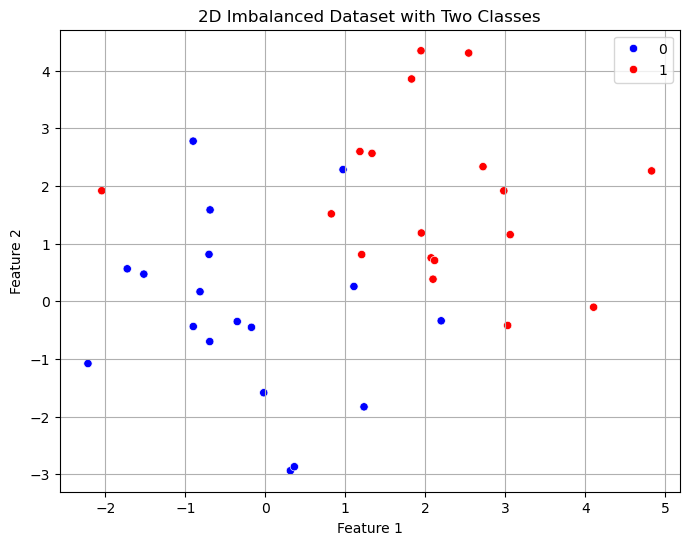

In [43]:
# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:, 1], hue=y_resampled, palette=palette)
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### __Train and Evaluate the Logistic Regression Classifier__

- Initialize and train a Logistic Regression classifier on the undersampled training data.
- Predict on the training and testing set and calculate the accuracy.

Classification Report (With Under Sampling):
              precision    recall  f1-score   support

           0       0.25      0.86      0.39         7
           1       0.99      0.84      0.91       113

    accuracy                           0.84       120
   macro avg       0.62      0.85      0.65       120
weighted avg       0.95      0.84      0.88       120

ROC AUC Score (With Under Sampling): 0.92
Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): 0.99



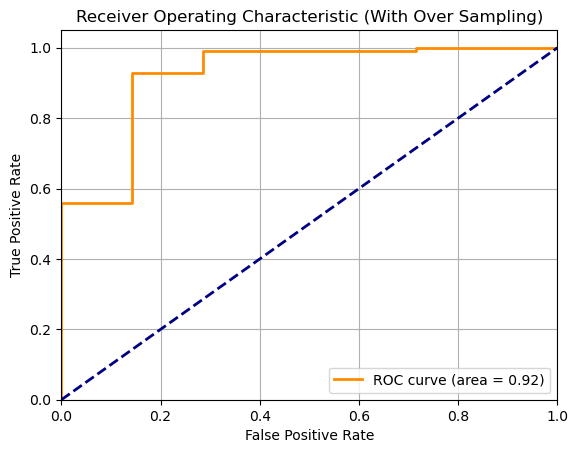

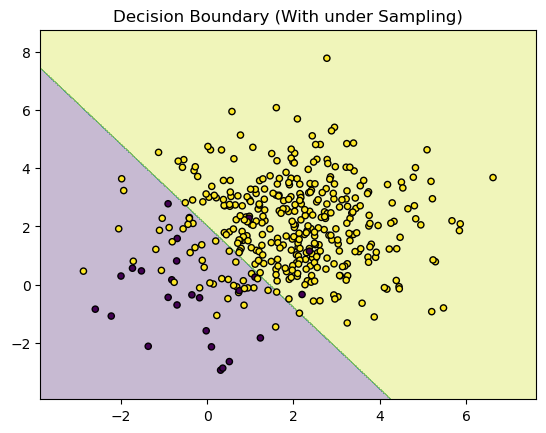

In [52]:
# Initialize and train LogisticRegression classifier on resampled data
classifier_rus = LogisticRegression()
classifier_rus.fit(X_resampled, y_resampled)

# Predict test set
y_pred_test_rus = classifier_rus.predict(X_test)
y_pred_test_proba_rus = classifier_rus.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Under Sampling):")
print(classification_report(y_test, y_pred_test_rus))

# Print ROC AUC Score for resampled data
print(f"ROC AUC Score (With Under Sampling): {roc_auc_score(y_test, y_pred_test_proba_rus):.2f}")
print(f'Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): {average_precision_score(y_test, y_pred_test_proba_rus):.2f}\n')

# Plotting ROC AUC Curve for resampled data
fpr_rus, tpr_rus, _ = roc_curve(y_test, y_pred_test_proba_rus)
plt.figure()
plt.plot(fpr_rus, tpr_rus, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba_rus))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With under Sampling)")
    plt.show()

# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_rus)


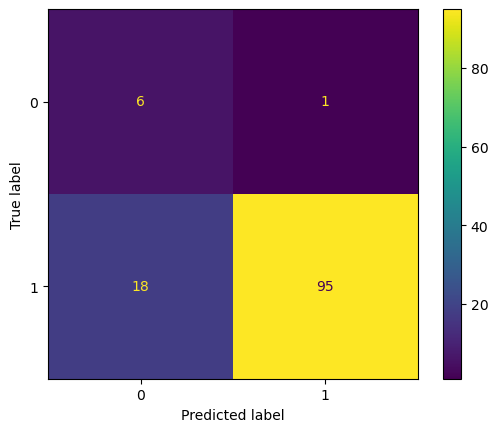

In [45]:
# Print confusion matrix
conf_matrix_rus = confusion_matrix(y_test, y_pred_test_rus)

# Heatmap visualization for confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix_rus)

# display matrix
cm_display.plot()
plt.show()

### __4. Random Oversampling technique - Random Dataset__

In [47]:
# Applying Random Over Sampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [49]:
X_resampled.shape

(524, 2)

In [50]:
pd.Series(y_resampled).value_counts()

1    262
0    262
Name: count, dtype: int64

#### __Plotting the balanced dataset__

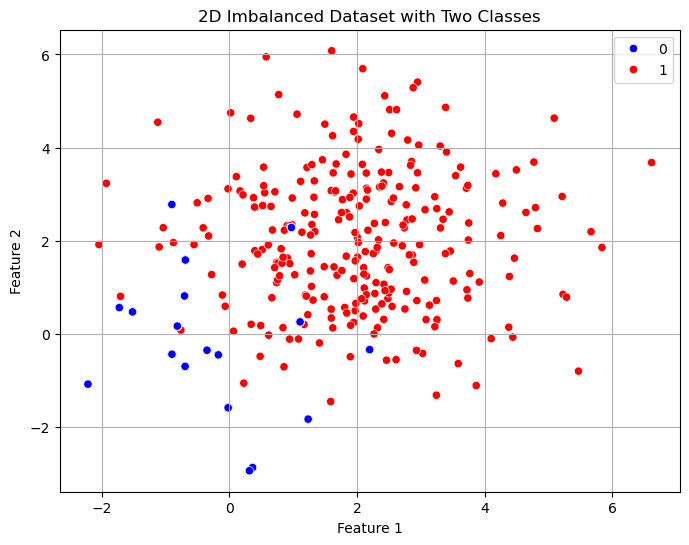

In [48]:
# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_resampled[:, 0], y=X_resampled[:, 1], hue=y_resampled, palette=palette)
plt.title('2D Imbalanced Dataset with Two Classes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

#### __Train and Evaluate the Logistic Regression Classifier__

- Initialize and train a Logistic Regression classifier on the oversampled training data.
- Predict on the training and testing set and calculate the accuracy.

Classification Report (With Over Sampling):
              precision    recall  f1-score   support

           0       0.25      0.86      0.39         7
           1       0.99      0.84      0.91       113

    accuracy                           0.84       120
   macro avg       0.62      0.85      0.65       120
weighted avg       0.95      0.84      0.88       120

ROC AUC Score (With Over Sampling): 0.92
Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): 0.99



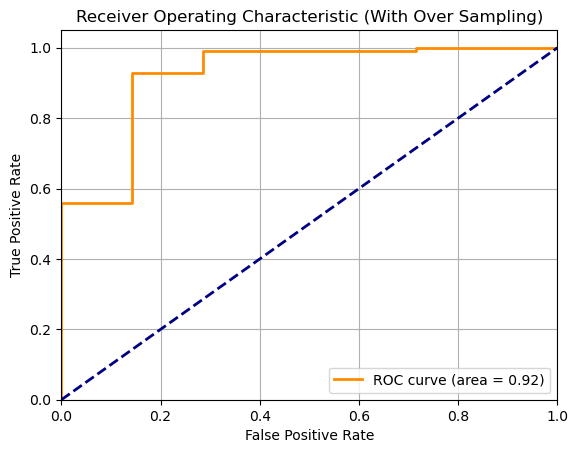

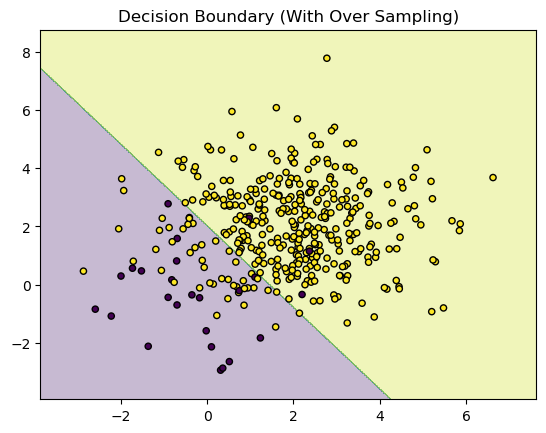

In [53]:
# Initialize and train RandomForest classifier on resampled data
classifier_ros = LogisticRegression()
classifier_ros.fit(X_resampled, y_resampled)

# Predict test set
y_pred_test_ros = classifier_ros.predict(X_test)
y_pred_test_proba_ros = classifier_ros.predict_proba(X_test)[:, 1]

# Print classification report for resampled data
print("Classification Report (With Over Sampling):")
print(classification_report(y_test, y_pred_test_ros))

# Print ROC AUC Score for resampled data
print(f"ROC AUC Score (With Over Sampling): {roc_auc_score(y_test, y_pred_test_proba_ros):.2f}", )
print(f'Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): {average_precision_score(y_test, y_pred_test_proba_ros):.2f}\n')


# Plotting ROC AUC Curve for resampled data
fpr_ros, tpr_ros, _ = roc_curve(y_test, y_pred_test_proba_ros)
plt.figure()
plt.plot(fpr_ros, tpr_ros, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba_ros))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (With Over Sampling)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Function to plot decision boundaries for resampled data
def plot_decision_boundaries_ros(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary (With Over Sampling)")
    plt.show()

# Plot decision boundary for resampled data
plot_decision_boundaries_ros(X, y, classifier_ros)

### __5. Logistic Regression model with class weights - Random Dataset__

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.86      0.55         7
           1       0.99      0.92      0.95       113

    accuracy                           0.92       120
   macro avg       0.70      0.89      0.75       120
weighted avg       0.96      0.92      0.93       120

ROC AUC Score: 0.93
Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): 0.99



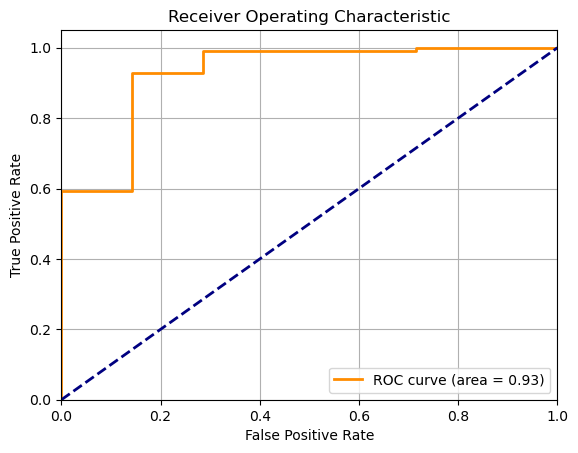

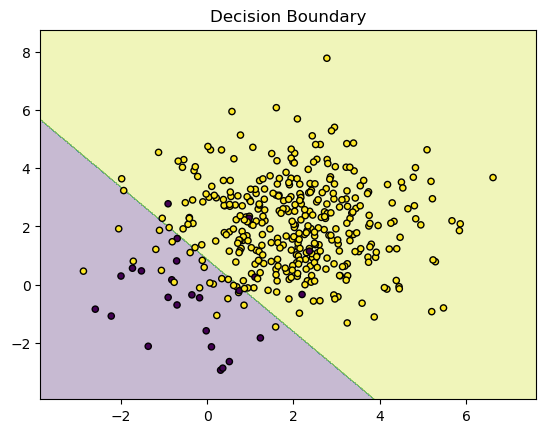

In [63]:
# Initialize and train LogisticRegression classifier
classifier = LogisticRegression(class_weight={1:1,0:5})
classifier.fit(X_train, y_train)

# Predict test set
y_pred_test = classifier.predict(X_test)
y_pred_test_proba = classifier.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Print ROC AUC Score
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_test_proba):.2f}", )
print(f'Area under the Precision-Recall Curve (AUCPR) (With Under Sampling): {average_precision_score(y_test, y_pred_test_proba):.2f}\n')

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_test_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_test_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=20)
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary
plot_decision_boundaries(X, y, classifier)
